In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
df = pd.read_csv('Somerville Crashes data.csv')
df.head()
df.tail()
df.shape
df.info()
df.describe()
df.isnull()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2428 entries, 0 to 2427
Data columns (total 32 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Crash Number                           2428 non-null   int64  
 1   Date and Time of Crash                 2428 non-null   object 
 2   Police Shift                           2428 non-null   object 
 3   Crash Location                         2428 non-null   object 
 4   Light Conditions                       2428 non-null   object 
 5   Weather Conditions                     2428 non-null   object 
 6   Road Surface                           2428 non-null   object 
 7   Road Contributing Circumstances        2428 non-null   object 
 8   Traffic Control Device Type            2428 non-null   object 
 9   Roadway Intersection Type              2428 non-null   object 
 10  Trafficway Description                 2428 non-null   object 
 11  Mann

,0
Crash Number,0
Date and Time of Crash,0
Police Shift,0
Crash Location,0
Light Conditions,0
Weather Conditions,0
Road Surface,0
Road Contributing Circumstances,0
Traffic Control Device Type,0
Roadway Intersection Type,0


In [10]:
# clean coloumn names (remove extra spaces)
df.columns = df.columns.str.strip()
# convert Date coloumn to datetime
df['Date and Time of Crash']= pd.to_datetime(df['Date and Time of Crash'],errors='coerce',dayfirst=True)
# Extract year,month, hour
df['Year']=df['Date and Time of Crash'].dt.year
df['Month']= df['Date and Time of Crash'].dt.month
df['Hour']= df['Date and Time of Crash'].dt.hour

In [11]:
# Extract year,month, hour
df['Year']=df['Date and Time of Crash'].dt.year
df['Month']= df['Date and Time of Crash'].dt.month
df['Hour']= df['Date and Time of Crash'].dt.hour


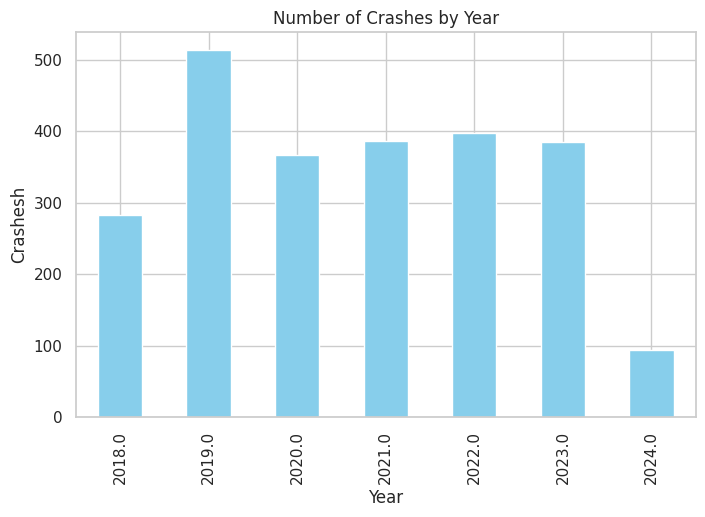

In [12]:
df['Year'].value_counts().sort_index().plot(kind="bar", figsize=(8,5),color="skyblue")
plt.title("Number of Crashes by Year")
plt.xlabel("Year")
plt.ylabel("Crashesh")
plt.show()


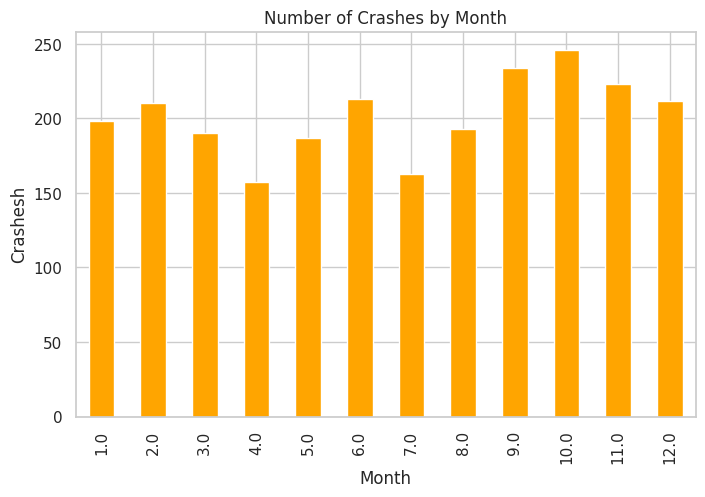

In [13]:
# by month
df['Month'].value_counts().sort_index().plot(kind="bar",figsize=(8,5), color="orange")
plt.title("Number of Crashes by Month")
plt.xlabel("Month")
plt.ylabel("Crashesh")
plt.show()

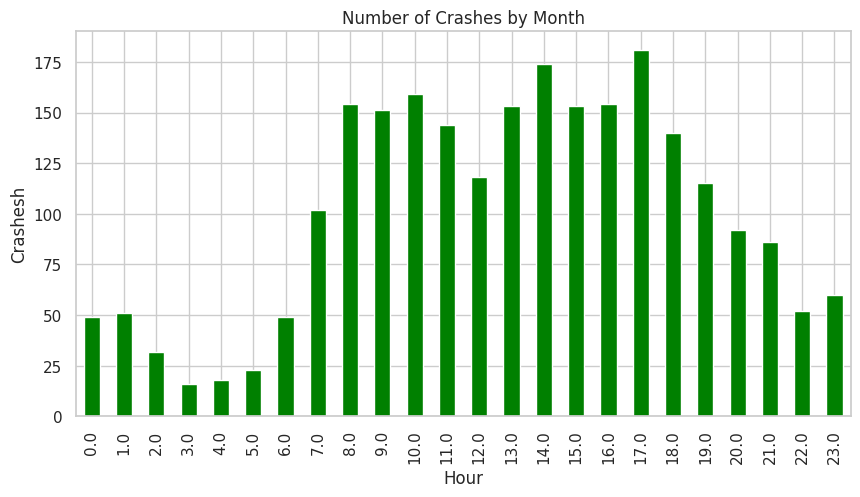

In [14]:
# by hour
df['Hour'].value_counts().sort_index().plot(kind="bar",figsize=(10,5), color="green")
plt.title("Number of Crashes by Month")
plt.xlabel("Hour")
plt.ylabel("Crashesh")
plt.show()

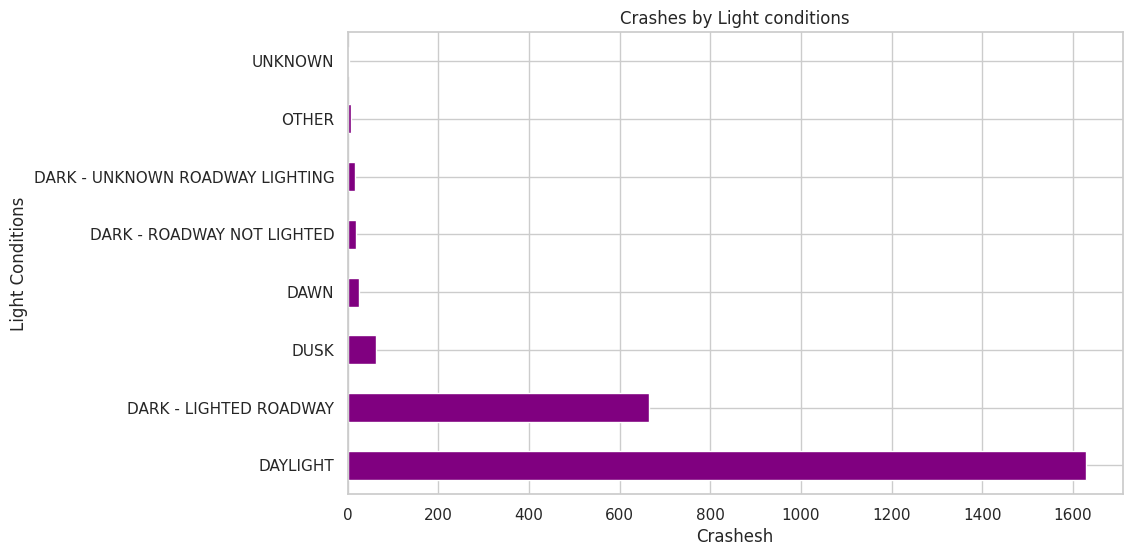

In [15]:
# Crashesh by light condition
df['Light Conditions'].value_counts().plot(kind="barh",figsize=(10,6), color="purple")
plt.title("Crashes by Light conditions")
plt.xlabel("Crashesh")
plt.show()

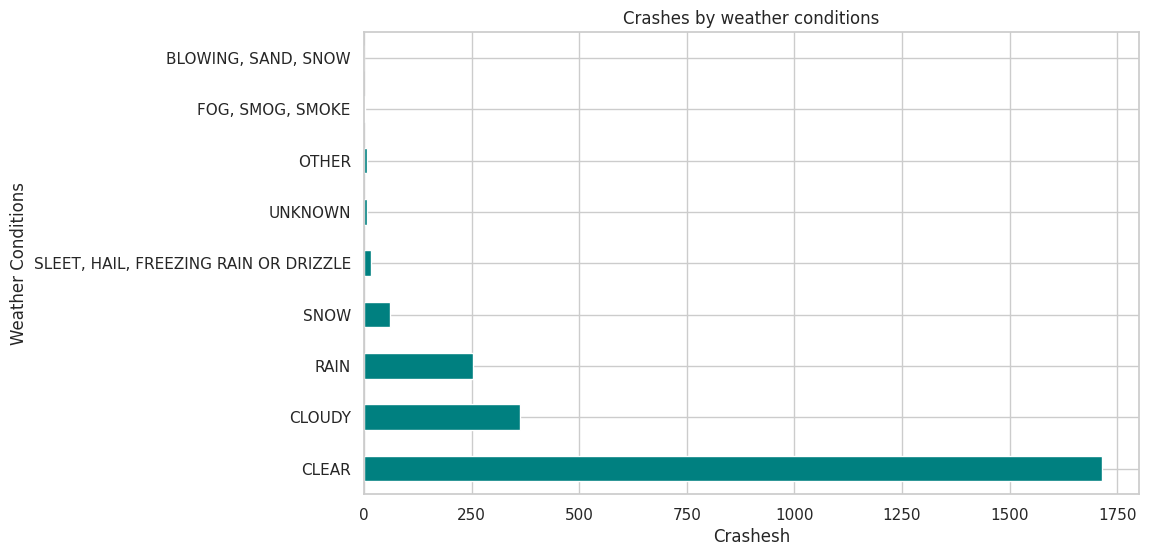

In [16]:
# Crashesh by weather condition
df['Weather Conditions'].value_counts().plot(kind="barh",figsize=(10,6), color="teal")
plt.title("Crashes by weather conditions")
plt.xlabel("Crashesh")
plt.show()

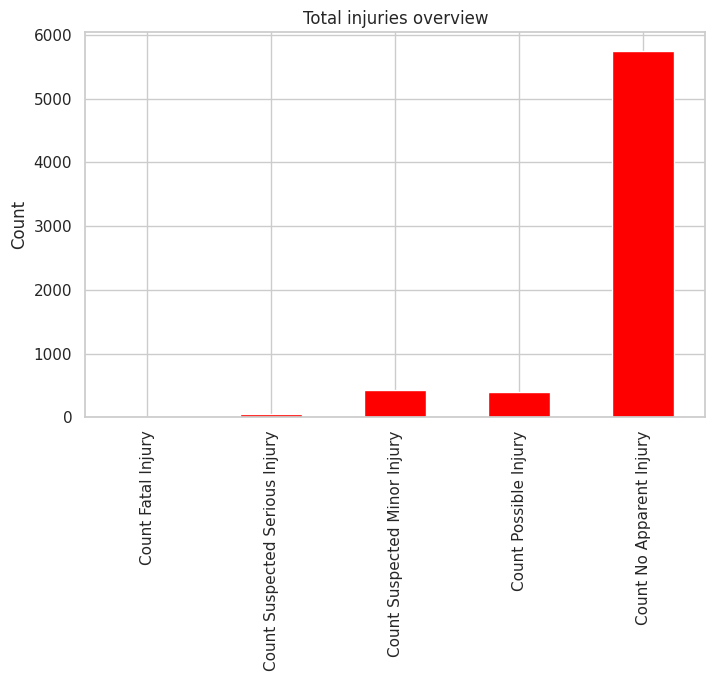

In [17]:
#Injuries Overview
injury_cols = [
    'Count Fatal Injury', 'Count Suspected Serious Injury',
    'Count Suspected Minor Injury', 'Count Possible Injury',
    'Count No Apparent Injury'
]
df[injury_cols].sum().plot(kind="bar", figsize=(8,5), color="red")
plt.title("Total injuries overview")
plt.ylabel("Count")
plt.show()

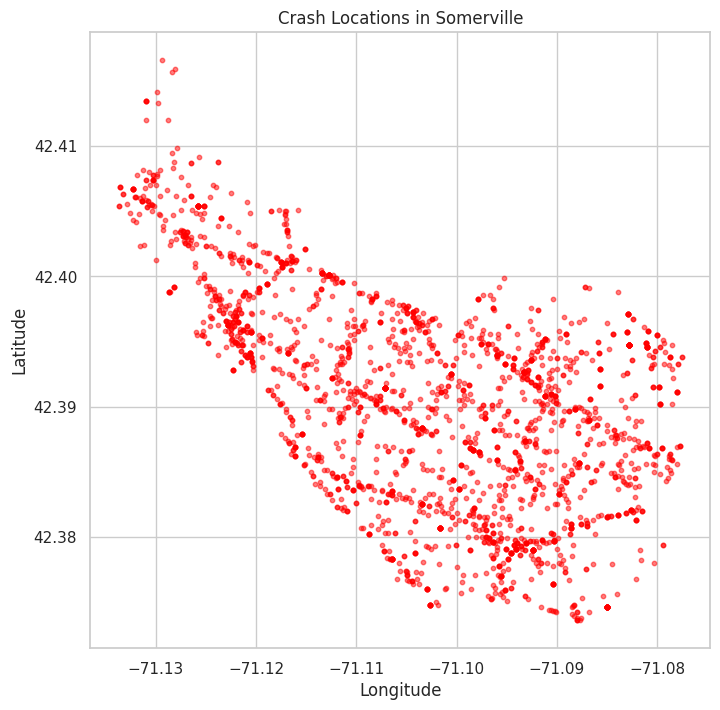

In [18]:
# Scatter plot of crash locations
plt.figure(figsize=(8,8))
plt.scatter(df["Longitude"], df["Latitude"], alpha=0.5, s=10, c="red")
plt.title("Crash Locations in Somerville")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()

/tmp/ipython-input-2486953035.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= df,x ='Year', palette= 'viridis')


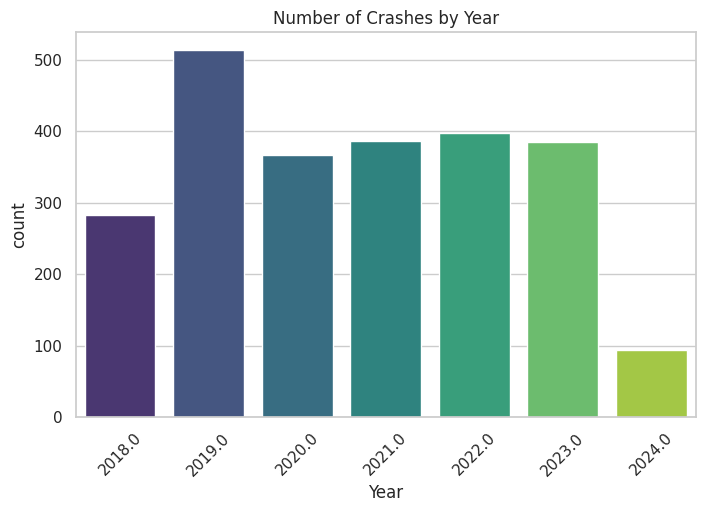

/tmp/ipython-input-2486953035.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Month',palette= 'plasma')


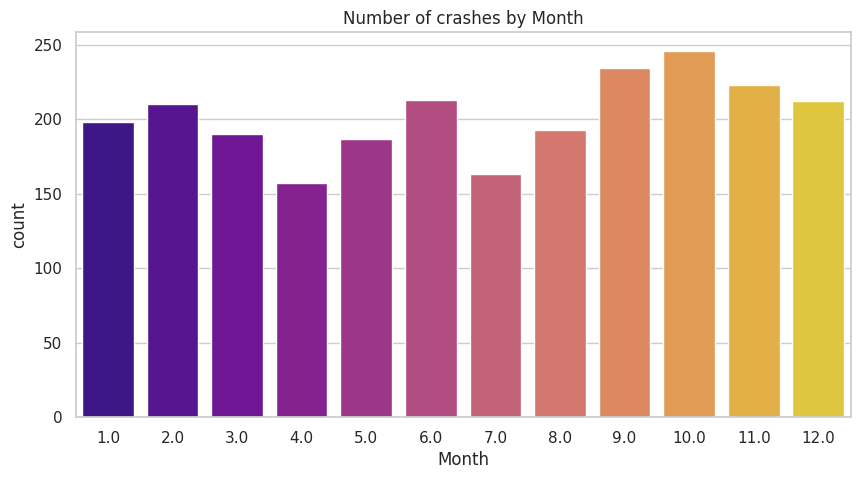

/tmp/ipython-input-2486953035.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Hour',palette= 'coolwarm')


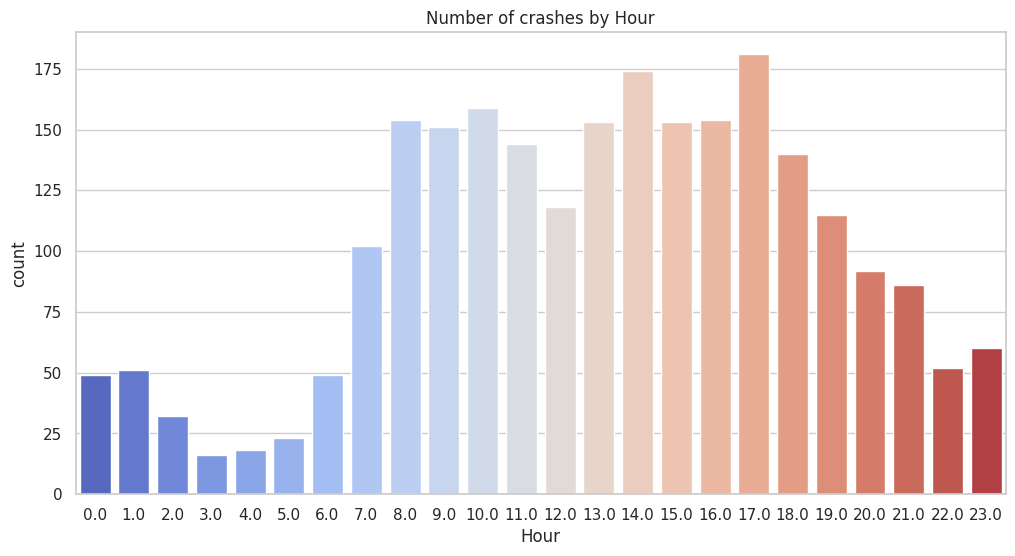

In [19]:
# Set plot style
sns.set(style="whitegrid")
# crashes by year
plt.figure(figsize=(8,5))
sns.countplot(data= df,x ='Year', palette= 'viridis')
plt.title("Number of Crashes by Year")
plt.xticks(rotation =45)
plt.show()

# crashes by Month
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Month',palette= 'plasma')
plt.title("Number of crashes by Month")
plt.show()

# crashes by Hour
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Hour',palette= 'coolwarm')
plt.title("Number of crashes by Hour")
plt.show()

/tmp/ipython-input-2499059745.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Light Conditions',order=df['Light Conditions'].value_counts().index,palette= 'Set2')


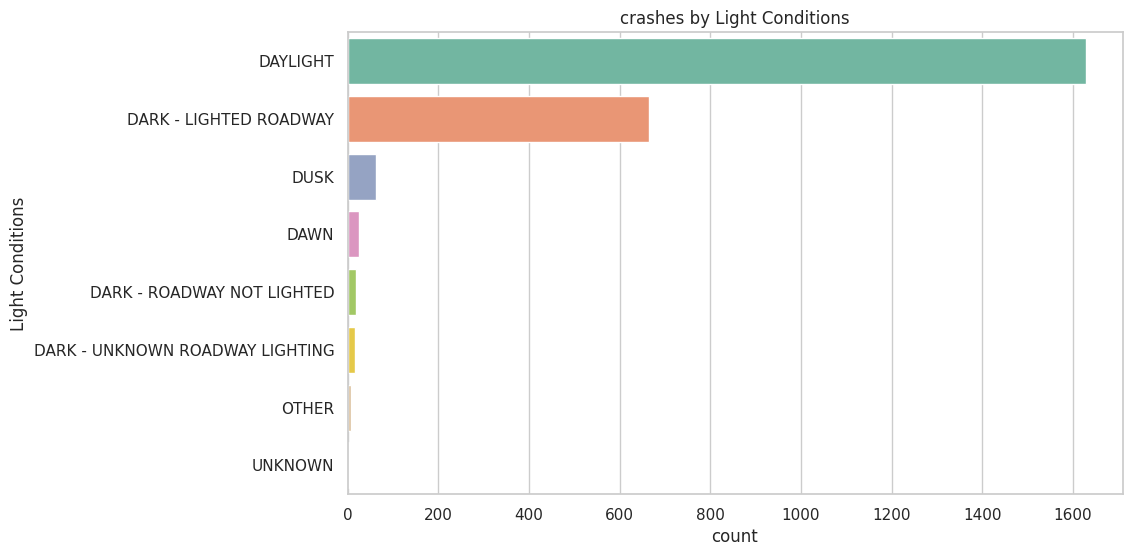

In [20]:
# crashes by Light conditions
plt.figure(figsize=(10,6))
sns.countplot(data=df, y='Light Conditions',order=df['Light Conditions'].value_counts().index,palette= 'Set2')
plt.title("crashes by Light Conditions")
plt.show()

/tmp/ipython-input-2509178309.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Weather Conditions',order=df['Weather Conditions'].value_counts().index,palette= 'Set3')


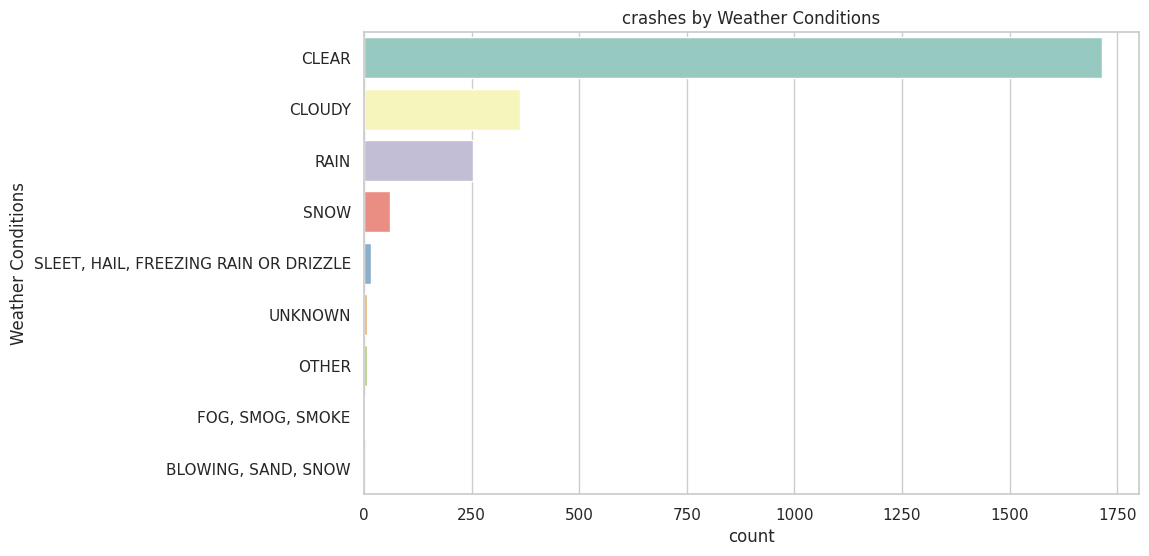

In [21]:
#crashes by Weather conditions
plt.figure(figsize=(10,6))
sns.countplot(data=df, y='Weather Conditions',order=df['Weather Conditions'].value_counts().index,palette= 'Set3')
plt.title("crashes by Weather Conditions")
plt.show()

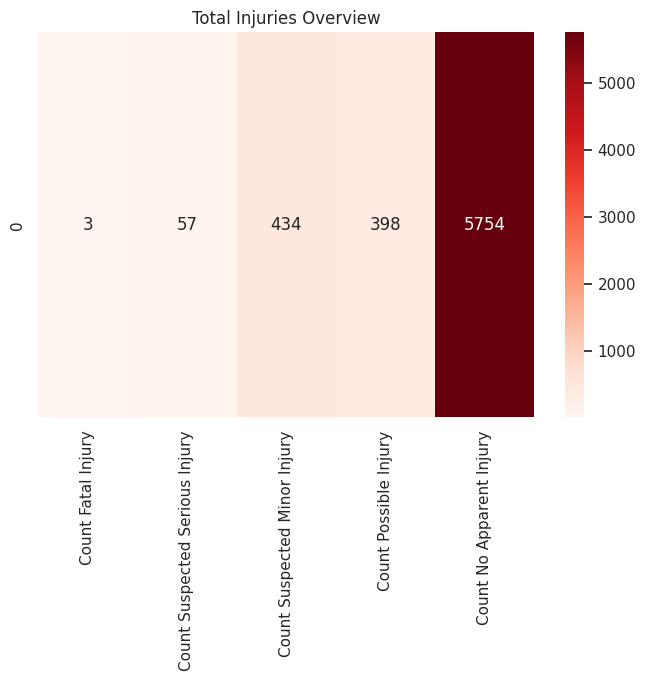

In [22]:
# Heatmap of Injuries
injury_cols =[
    'Count Fatal Injury', 'Count Suspected Serious Injury',
    'Count Suspected Minor Injury', 'Count Possible Injury',
    'Count No Apparent Injury'
]
plt.figure(figsize=(8,5))
sns.heatmap(df[injury_cols].sum().to_frame().T,annot=True,cmap="Reds",fmt='g')
plt.title("Total Injuries Overview")
plt.show()


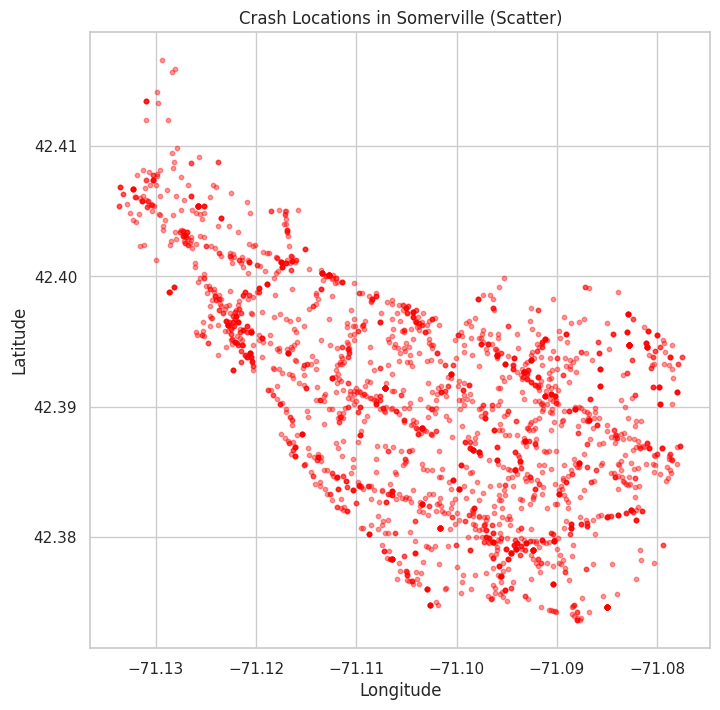

In [23]:
# Basic Scatter plot
plt.figure(figsize=(8,8))
plt.scatter(df["Longitude"],df["Latitude"],alpha= 0.4, s=10, c="red")
plt.title("Crash Locations in Somerville (Scatter)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()


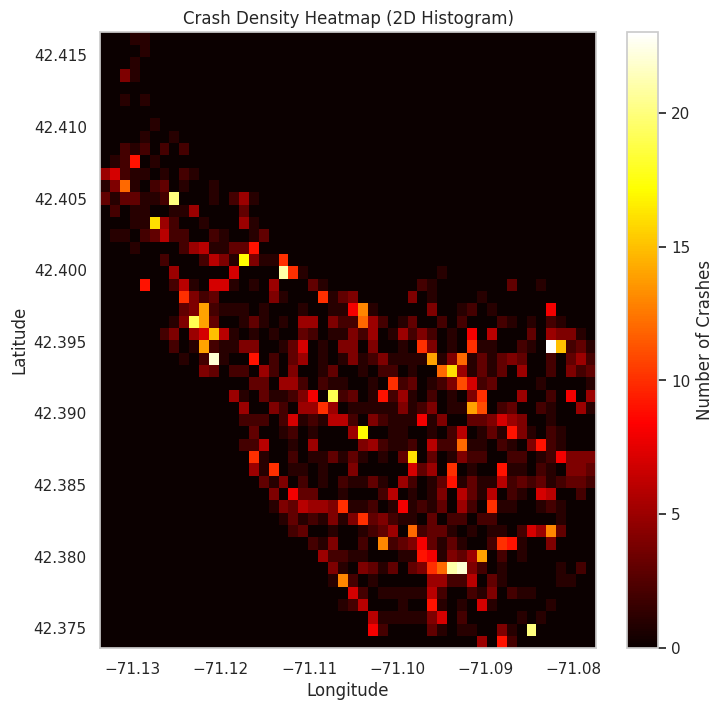

In [24]:
# 2D Histogram Heatmap
plt.figure(figsize=(8,8))
plt.hist2d(df["Longitude"], df["Latitude"], bins=50, cmap="hot")
plt.colorbar(label="Number of Crashes")
plt.title("Crash Density Heatmap (2D Histogram)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

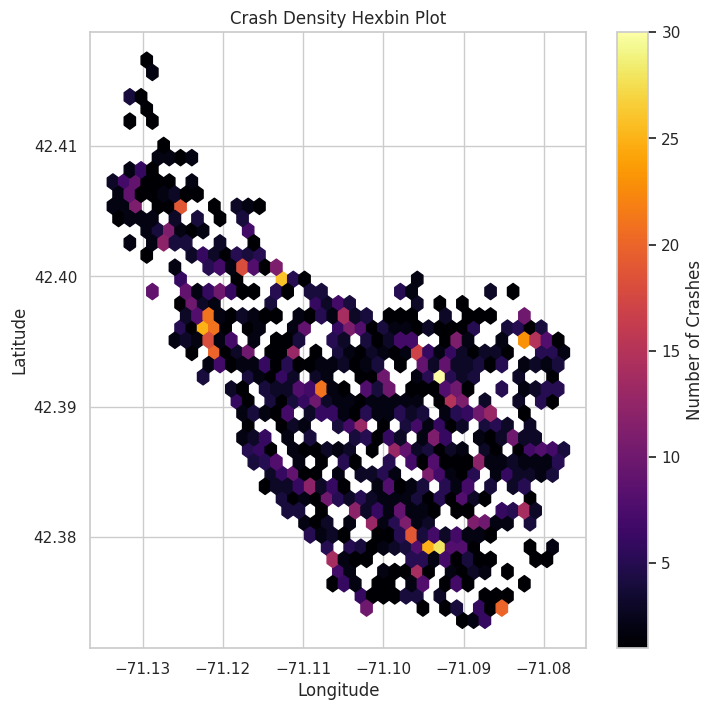

In [25]:
# Hexbin Plot
plt.figure(figsize=(8,8))
plt.hexbin(df["Longitude"], df["Latitude"], gridsize=40, cmap="inferno", mincnt=1)
plt.colorbar(label="Number of Crashes")
plt.title("Crash Density Hexbin Plot")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [29]:
m = folium.Map(location=[df["Latitude"].mean(), df["Longitude"].mean()], zoom_start= 13)
# Scatter Markers
for _, row in df.iterrows():
  folium.CircleMarker(
      location = [row["Latitude"],row["Longitude"]],
      radius =2,
      color= "red",
      fill = True,
      fill_opacity = 0.6
  ).add_to(m)

# heatmap
heat_data = df[["Latitude","Longitude"]].values.tolist()
HeatMap(heat_data, radius=10, blur=15, max_zoom=1).add_to(m)

# Save map as HTML
m.save("Somerville_Crash_Map.html")
print("Map saved as Someville_Carsh_Map.html. Open it in your browser")


Map saved as Someville_Carsh_Map.html. Open it in your browser
